<h1>Fitting Neural Networks</h1>

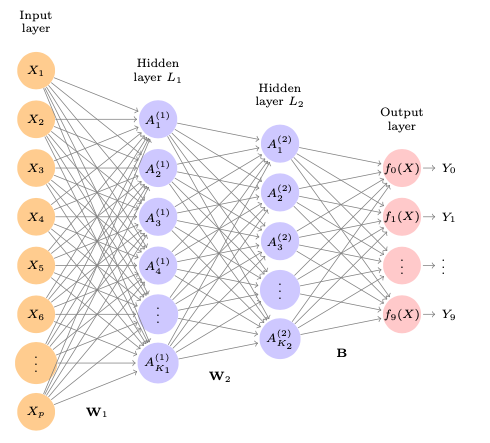

In [1]:
from IPython.display import Image
Image(filename = "multilayernn.png", width=400, height=400)

In a multi-layer architecture how do we update the weights in each layer of the model?

We can compare the output layer to our observed response. Should we then try to update all of the parameters in the neural network at once? We can work through the problem and substitue the activation functions from each of the layers into the previous layer to express this as a minimization problem:
$$g(g(g(...(g(z))...)))$$

When we take the derivative of a composite function we can apply the chain rule. Without going through the math, the chain rule basically assigns a fraction of the derivative to each of the weights to learn from (or be updated by). This fractional update is referred to as "backpropagation". Otherwise, the optimization happens as we have described it before.

The challenge is that in general the solution to this optimization problem is nonconvex -- that means that there are many local minima. We need to be far more careful in setting up the learning algorithm in order to converge to the optimal solution.

Let's see this applied to the overfit case in the previous section.

We have a few different levers we can try to improve the performance/avoid overfitting:
- change the batch size or number of epochs
- change the optimizer
- change the architecture
- change the amount of regularization

In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2022-10-16 17:08:10.852068: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

<h2>Batch Size and Epochs</h2>

In [4]:
out = []
for j in [100,150,250,500,1000]:
    for k in [10,20,30,40,50]:
        model = keras.Sequential()
        model.add(keras.layers.Dense(16, input_shape=(8,), activation='relu'))
        model.add(keras.layers.Dense(4, input_shape=(16,), activation='relu'))
        model.add(keras.layers.Dense(2, input_shape=(4,), activation='relu'))
        model.add(keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(X, y, epochs=j, batch_size=k, verbose=False)
        _, accuracy = model.evaluate(X, y)
        print('Accuracy: %.2f' % (accuracy*100))
        out.append([j,k,accuracy*100])

2022-10-16 17:08:22.850453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


24/24 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7044
Accuracy: 70.44
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.6654
Accuracy: 66.54
24/24 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.6536
Accuracy: 65.36
24/24 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - acc

<h2>Model Architecture</h2>

In [ ]:
out1 = []
for j in range(1,17):
    for k in range(1,17):
        for i in range(1,17):
            model = keras.Sequential()
            model.add(keras.layers.Dense(j, input_shape=(8,), activation='relu'))
            model.add(keras.layers.Dense(k, input_shape=(j,), activation='relu'))
            model.add(keras.layers.Dense(i, input_shape=(k,), activation='relu'))
            model.add(keras.layers.Dense(1, input_shape=(i,), activation='sigmoid'))

            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            history = model.fit(X, y, epochs=150, batch_size=10, verbose=False)
            _, accuracy = model.evaluate(X, y)
            print('Accuracy: %.2f' % (accuracy*100))
            out1.append([j,k,i,accuracy*100])

24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6536
Accuracy: 65.36
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7279
Accuracy: 72.79
24/24 [==============================] - 0s 2ms/step - loss: 0.6068 - acc

24/24 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6497
Accuracy: 64.97
24/24 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.7708
Accuracy: 77.08
24/24 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7695
Accuracy: 76.95
24/24 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.6536
Accuracy: 65.36
24/24 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6536
Accuracy: 65.36
24/24 [==============================] - 0s 1ms/step - loss: 0.5033 - acc

24/24 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7292
Accuracy: 72.92
24/24 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7539
Accuracy: 75.39
24/24 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7656
Accuracy: 76.56
24/24 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7617
Accuracy: 76.17
24/24 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7253
Accuracy: 72.53
24/24 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7096
Accuracy: 70.96
24/24 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.6628
Accuracy: 66.28
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7500
Accuracy: 75.00
24/24 [==============================] - 0s 2ms/step - loss: 0.6462 - acc

24/24 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.6953
Accuracy: 69.53
24/24 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.6536
Accuracy: 65.36
24/24 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.6966
Accuracy: 69.66
24/24 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.6849
Accuracy: 68.49
24/24 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.7148
Accuracy: 71.48
24/24 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.6536
Accuracy: 65.36
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6510
Accuracy: 65.10
24/24 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7604
Accuracy: 76.04
24/24 [==============================] - 0s 2ms/step - loss: 0.5191 - acc

24/24 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7096
Accuracy: 70.96
24/24 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7526
Accuracy: 75.26
24/24 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.7161
Accuracy: 71.61
24/24 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7695
Accuracy: 76.95
24/24 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.7370
Accuracy: 73.70
24/24 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7760
Accuracy: 77.60
24/24 [==============================] - 0s 1ms/step - loss: 0.5638 - accuracy: 0.7070
Accuracy: 70.70
24/24 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7474
Accuracy: 74.74
24/24 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7135
Accuracy: 71.35
24/24 [==============================] - 0s 1ms/step - loss: 0.6468 - acc

<h2>Regularization</h2>

In [ ]:
out2 = []
for i in np.logspace(0.001,1.0,5):
    for j in np.logspace(0.001,1.0,5):
        for k in np.logspace(0.001,1.0,5):
            model = keras.Sequential()
            model.add(keras.layers.Dense(16, input_shape=(8,), activation='relu', kernel_regularizer=keras.regularizers.l1(l1=i)))
            model.add(keras.layers.Dense(4, input_shape=(16,), activation='relu', kernel_regularizer=keras.regularizers.l1(l1=j)))
            model.add(keras.layers.Dense(2, input_shape=(4,), activation='relu', kernel_regularizer=keras.regularizers.l1(l1=k)))
            model.add(keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'))

            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            history = model.fit(X, y, epochs=150, batch_size=10, verbose=False)
            histories.append(history.history['loss'])
            _, accuracy = model.evaluate(X, y)
            accuracies.append([i,j,k,accuracy*100])
            print('Accuracy: %.2f' % (accuracy*100))
            out2.append([i,j,k,accuracy*100])

<h2>Dropout</h2>

Another way to regularize a neural network is inspired by random forests. We can randomly remove a set of weights and biases when fitting a model. This is done each time a training observation is processed. The remaining weights and biases are scaled up by an equivalent amount. Similar to random forests preventing one feature from being too dominant, this prevents one node from becoming too dominant. 